In [1]:
import pandas as pd
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
appt_file = r"C:\Users\sushmita-khan\Desktop\Career Development Report\NOV_1\appt_data.csv"
user_note = r"C:\Users\sushmita-khan\Desktop\Career Development Report\NOV_1\user_note.csv"

In [3]:
df_data = pd.read_csv(appt_file, header=1)
df_note = pd.read_csv(user_note, header=1)

In [4]:
#Renaming some headers
df_data.rename(columns = {"School Of": "college_name", "ClassLevel": "student_class", 
                                     "Name": "student_name","Appt Type":"type", "Admin First Name": "admin_fName",
                                    "Admin Last Name": "admin_lName", "Start Time": "s_time", "End Time":"e_time",
                                    "Arrival Wait Time": "wait_time", "Class Level":"student_class",
                         'Student Id': 'ID'}, inplace=True)


#Renaming some college names/Cells in dataframe

df_data.replace('College of Behavioral and Social Sciences', 'Behavioral and Social Sciences', inplace=True)
df_data.replace('College of Health Professions', 'Health Professions', inplace=True)
df_data.replace('Graduate Masters', 'Masters', inplace=True)
df_data.replace('Engineering/Information Tech', 'Engineering and Computing', inplace=True)

#Join Admin Names/two columns
df_data["admin_name"] = df_data[["admin_fName", "admin_lName"]].apply(lambda x: ' '.join(x), axis=1)

#Convert student ID to string
df_data['ID'] = df_data.ID.apply(str)

In [5]:
#Total Traffic is the total rows in csv minus the header

total_traffic = df_data.count()
df_data.shape

(166, 22)

In [6]:
#CALCULATE AVERAGE WAIT TIME

df_data['s_time'] = pd.to_datetime(df_data['s_time'])
df_data['Check-In Time'] = pd.to_datetime(df_data['Check-In Time'])

df_data["wait"] = df_data['s_time'] - df_data['Check-In Time']

df_data["wait"]=df_data["wait"]/np.timedelta64(1,'m')

# print(type(df_data["wait"]))
# print(df_data['wait'])

sum_ = 0
len_ = 0
for i in df_data["wait"]:
#     print(type(i))
    if i > 0.0 and i < 150:
        sum_ = sum_ + i
        len_ = len_+1
print(sum_)
print(len_)

avg_wait = float(sum_/len_)

print(avg_wait)

wait_result = '{0:02.0f}:{1:02.0f}'.format(*divmod(avg_wait * 60, 60))
print("Average Wait Length(in minutes): " + wait_result)

639.9666666666665
163
3.926175869120653
Average Wait Length(in minutes): 03:56


In [7]:
#FLAGS FOR WAIT TIME GREATER THAN 15 MINUTES

flag_wait = df_data.loc[df_data['wait'] >= 15]
flag_wait = flag_wait[['student_name', 'college_name','ID', 'admin_name','type','Check-In Time', 's_time']]
flag_wait.rename(columns={'student_name': 'Student Name', 'college_name': 'College Name', 'admin_name': 'Admin Name', 
                          'type': 'Meeting Type', 's_time': 'Date & Start Time'}, inplace=True)

In [8]:
# (HTML(flag_wait.to_html(header=True,index=False, justify='right',col_space= 100, show_dimensions = True)))
display(flag_wait)
# path = r'C:\Users\sushmita-khan\Desktop\Career Development Report\OCT_1'
# flag_wait.to_csv('wait_time.csv',sep=',', encoding='utf-8')

,Student Name,College Name,ID,Admin Name,Meeting Type,Check-In Time,Date & Start Time
25,Gabrielle Guadeloupe,Engineering and Computing,900990893.0,Pamela Goodman,campus interview,2019-12-06 14:36:22,2019-12-06 15:36:40
35,Patrick Hubbard,Science and Mathematics,900915762.0,Brandon Solie,scheduled,2019-12-06 09:52:28,2019-12-06 11:20:57
46,Savannah Davis,Health Professions,901128837.0,Rhonda Ruesch,walk-in,2019-12-06 15:17:11,2019-12-06 16:13:15
69,Ray Haggins,Business,901204853.0,Katherine Kennon,scheduled,2019-12-06 09:38:17,2019-12-06 09:53:34
72,Alexandria Hendrickson,Science and Mathematics,901176286.0,FYE Staff,walk-in,2019-12-06 11:01:53,2019-12-06 11:20:31
108,Jacob Lifsey,Business,901001445.0,Theresa Duggar,scheduled,2019-12-06 13:49:48,2019-12-06 14:10:10
142,Macey Asmann,Engineering and Computing,901209402.0,Matthew Loftis,scheduled,2019-12-06 08:43:06,2019-12-06 09:06:19
144,Analeece Long,Science and Mathematics,901015320.0,Brandon Solie,scheduled,2019-12-06 09:11:39,2019-12-06 09:32:41
155,Miriam Cipleu,Health Professions,900985600.0,Olivia Riner,walk-in,2019-12-06 12:07:22,2019-12-06 12:25:07
165,Brianna Mckinney,Behavioral and Social Sciences,900888585.0,Crystal Goode,scheduled,2019-12-06 15:52:54,2019-12-06 16:13:31


,0
student_class,
Freshman,50
Sophomore,32
Junior,27
Senior,54
Masters,1


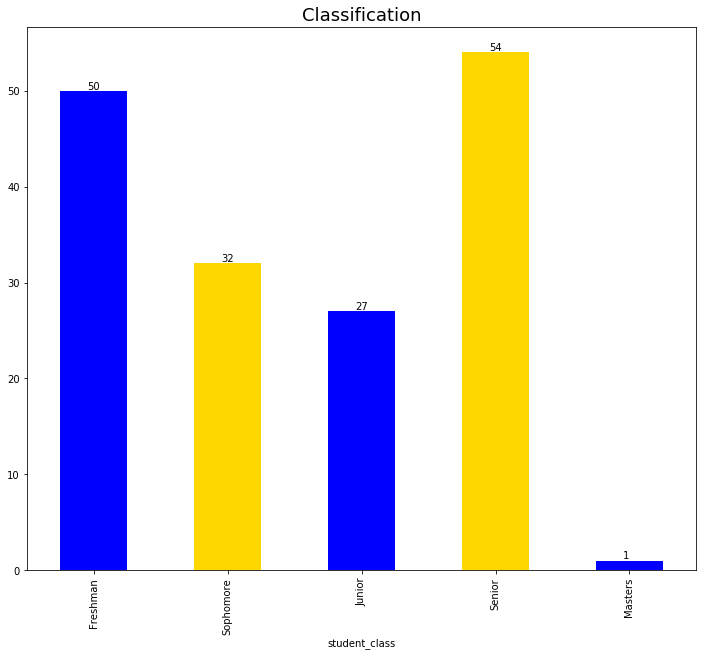

In [9]:
new_index = ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Masters']
class_count = df_data.groupby('student_class').size()
# print(type(class_count))
class_count = class_count.sort_values(ascending=False)
class_count = class_count.reindex(new_index)

display(class_count.to_frame().fillna(0))
student_classBar = class_count.plot.bar(x='student_class', y='class_count', figsize=(12,10),color=["blue", "gold"])

#lABEL GRAPH
student_classBar.set_title("Classification", fontsize=18)

#SET AXIS
# pur

# student_classBar.set_yticks([0,2,4,6,8])

#ANNOTATE BARS
totals = []

# find the values and append to list
for i in student_classBar.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in student_classBar.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        student_classBar.text(i.get_x()+0.2, i.get_height()+0.2, \
            str(i.get_height()), fontsize=10, color='black')

# invert for largest on top 
# student_classBar.invert_yaxis()


,0
college_name,
Arts and Humanities,13
Behavioral and Social Sciences,25
Business,31
Education,2
Engineering and Computing,35
Health Professions,34
Science and Mathematics,24
VP Academic Affairs,1


Text(0.5, 1.0, 'College')

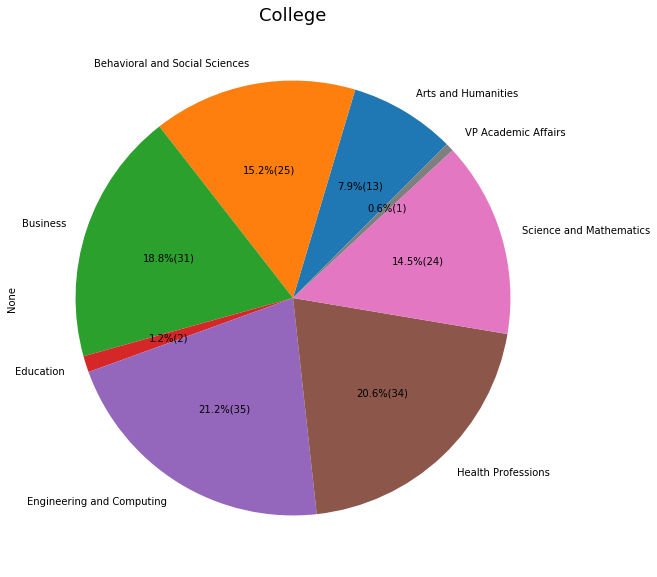

In [10]:
#DISTRIBUTION BY COLLEGE

college_count = df_data.groupby('college_name').size()
display(college_count.to_frame())


colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
col_plot = college_count.plot(kind='pie', autopct=lambda p: '{:.1f}%({:.0f})'.format(p, (p/100)*college_count.sum()), 
                              figsize=[10,10], startangle=45)
col_plot.set_title("College", fontsize=18)

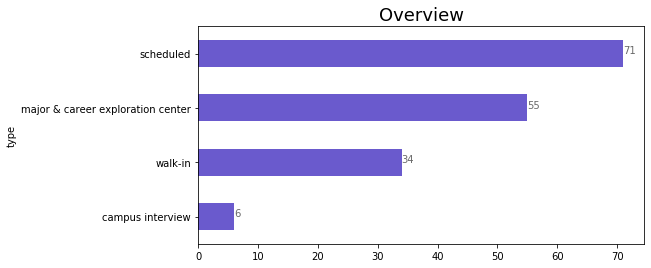

In [11]:
#APPOINTMENT TYPES

appt_type_count = df_data.groupby('type').size()
appt_type_count = appt_type_count.sort_values(ascending=True)
appt_typeBarh = appt_type_count.plot.barh(x='appt_type_count', y='type',figsize=(8,4),color="slateblue")

#lABEL GRAPH
appt_typeBarh.set_title("Overview", fontsize=18)

#SET AXIS
# appt_typeBarh.set_xticks([0,2,4,6,8])

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in appt_typeBarh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in appt_typeBarh.patches:
    # get_width pulls left or right; get_y pushes up or down
    appt_typeBarh.text(i.get_width()+.01, i.get_y()+.25, \
            str(i.get_width()), fontsize=10, color='dimgrey')

# invert for largest on top 
# appt_ServiceBarh.invert_yaxis()


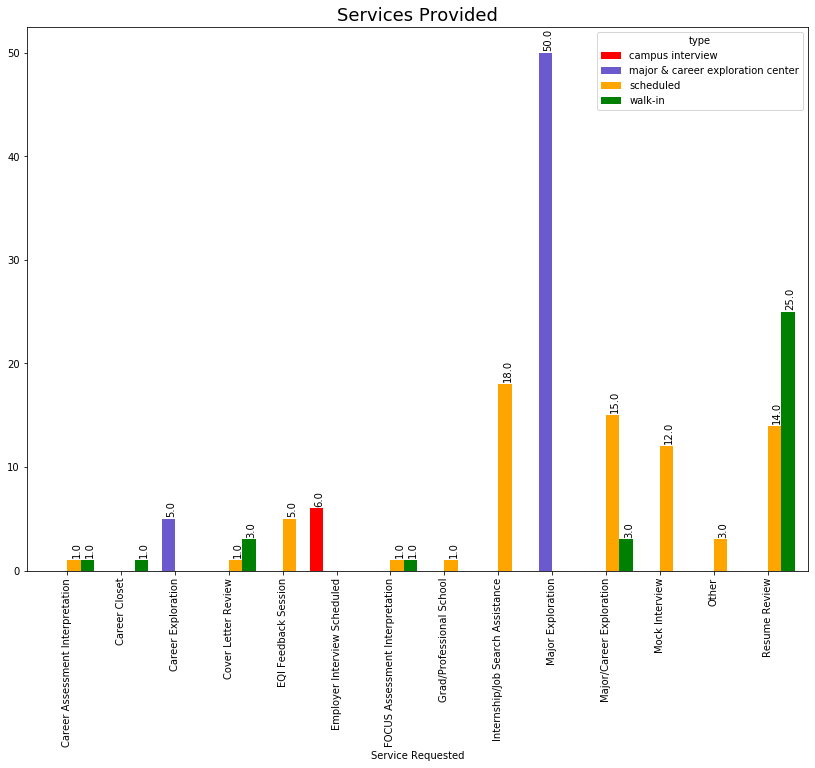

In [12]:
#SERVICE PROVIDED

df_data['COUNTER'] = 0       #initially, set that counter to 0.
group_service = df_data.groupby(['Service Requested', 'type'])['COUNTER'].size()
# print(group_service)
group_service = group_service.sort_values(ascending=True)

# display(group_service.to_frame())

group_service_barh = group_service.unstack().plot(kind='bar',figsize=(14,10), color=['red', 'slateblue', "orange","green"], 
                                                  width=1)
group_service_barh.set_alpha(11)
# group_service_barh.set_yticks([100,200,300,400,500,600])

#lABEL GRAPH
group_service_barh.set_title("Services Provided", fontsize=18)
    
#SET AXIS
# group_service_barh.set_xticks([0,2,4,6,8])

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in group_service_barh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list

total = sum(totals)

# set individual bar lables using above list
for i in group_service_barh.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        group_service_barh.text(i.get_x()+0.08, i.get_height()+0.4, \
                str(i.get_height()), fontsize=10, color='black',rotation=90)


In [13]:
group_service = group_service.to_frame()

display(HTML(group_service.to_html()))

,,COUNTER
Service Requested,type,
Career Assessment Interpretation,scheduled,1
Grad/Professional School,scheduled,1
FOCUS Assessment Interpretation,scheduled,1
Cover Letter Review,scheduled,1
FOCUS Assessment Interpretation,walk-in,1
Career Closet,walk-in,1
Career Assessment Interpretation,walk-in,1
Cover Letter Review,walk-in,3
Major/Career Exploration,walk-in,3


In [14]:
#Find Meeting Length
df_data["e_time"] = pd.to_datetime(df_data["e_time"])
df_data["s_time"] = pd.to_datetime(df_data["s_time"])

# display(df_data["e_time"])
# display(df_data["s_time"])

df_data["meeting_len"] = df_data['e_time'] - df_data['s_time']

# display(df_data['meeting_len'])

#Convert to Minutes
df_data["meeting_len"]=df_data["meeting_len"]/np.timedelta64(1,'m')
# print(type(df_data["meeting_len"]))

df_data["meeting_len"]=df_data["meeting_len"].fillna(0)

In [15]:
display(df_data["meeting_len"])

#Calculate Average Meeting Length

sum_ = 0
len_ = 0
for i in df_data["meeting_len"]:
#     print(type(i))
    if i < 1500:
#         print(i)
        sum_ = sum_ + i
        len_ = len_+1
print(sum_)
print(len_)

avg_meet_len = float(sum_/len_)

print(avg_meet_len)

result = '{0:02.0f}:{1:02.0f}'.format(*divmod(avg_meet_len * 60, 60))
print("Average Meeting Length: " + result)

0      38.650000
1      56.333333
2      14.316667
3      68.383333
4       0.000000
         ...    
161    53.683333
162     0.000000
163     3.700000
164    18.733333
165    44.850000
Name: meeting_len, Length: 166, dtype: float64

5889.8666666666695
166
35.481124497991985
Average Meeting Length: 35:29


In [16]:
#EMPLOYEE ANALYSIS
df_data['counter'] = 0
employee_service = df_data.groupby(['type', 'admin_name' ])['counter'].size()
# print(employee_service)

In [17]:
df_note.rename(columns={'Name':'Employee Name','Method': 'Appointment Type', 'Total Notes': 'Count'}, inplace=True)
df_note['Appointment Type'].fillna('No Input', inplace=True)
# df_note.sort_values(by=['Count'], inplace=True, ascending=False)
df_note.groupby('Employee Name').size()

Employee Name
Amy Rowell          2
Brandon Solie       2
Bridges Adams       1
Caitlyn Cofer       1
Caroline Davis      2
Crystal Goode       3
David Johnson       1
Emily Aldridge      2
FYE Staff           1
Gersen Van Gunst    2
Hafsa Junaid        1
Janeyce Brown       2
John Eubanks        2
Lakia Hillard       3
Madyson Carlson     2
Mariah Jessie       1
Matthew Loftis      2
Meredith Post       2
Olivia Riner        2
Rachael Barrett     2
Rhonda Ruesch       2
Taylor Bradish      1
Terri Hill          2
Theresa Duggar      2
Tiffany Williams    2
Tyree Pryor         2
dtype: int64

In [18]:
display(HTML(df_note.to_html(header=True, index=False, justify='justify-all',col_space= 150, show_dimensions=True)))

Employee Name,Appointment Type,Count
Amy Rowell,Appointment,10
Amy Rowell,Email,2
Brandon Solie,Appointment,8
Brandon Solie,Email,4
Bridges Adams,Appointment,14
Caitlyn Cofer,Appointment,4
Caroline Davis,Appointment,10
Caroline Davis,Email,3
Crystal Goode,Appointment,5
Crystal Goode,Email,1


In [19]:
# wait_time = r"C:\Users\sushmita-khan\Desktop\Career Development Report\OCT_1\wait_time.csv"
# df_wait = pd.read_csv(wait_time, header=0)

# df_wait.rename(columns = {"Date & Start Time": "start_time"}, inplace=True)

In [20]:
# df_wait

In [21]:
# df_wait["Check-In Time"] = pd.to_datetime(df_wait["Check-In Time"])
# df_wait["start_time"] = pd.to_datetime(df_wait["start_time"])

# df_wait["Wait Time"] = df_wait["start_time"] - df_wait["Check-In Time"]


# df_wait["Wait Time"]=df_wait["Wait Time"].fillna(0)
# df_wait["Wait Time"] = pd.to_datetime(df_wait["Wait Time"])
# df_wait["Wait Time"] = df_wait["Wait Time"].dt.minute

# df_wait

In [22]:
# df_wait['COUNTER'] = 0
# mace_wait = df_wait.groupby(['Meeting Type', 'Admin Name', 'Wait Time'])['COUNTER'].size()

# mace_wait = mace_wait.to_frame()

In [23]:
# mace_wait

In [24]:
# display(HTML(mace_wait.to_html(header=True)))